MECANISMO CUATRO BARRAS

ANIMACION

In [ ]:
import numpy as np
import math as math
import array as arr
import pprint  # para depurar
import matplotlib.pyplot as plt  #Para graficas
import matplotlib.animation as FuncAnimation
import scipy.integrate as integrate 
import os
from time import sleep
%matplotlib inline

print ('MECANISMO DE CUATRO BARRAS')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["L3"] = float (input ('Introduce longitud L3:'))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["XA"] = 0
meca["YA"] = 0
meca["YB"] = 0

# Defino posicion inicial:
q = np.array ([[0.1], [meca["L1"]], [1], [0.2], [meca["theta"]]])
print('q: ' + str(q))

# JACOBIANO
def jacob_Phiq(q,meca):
    #Inicializa a cero la matriz jacobiana
    Jacob = np.zeros((5,5))

    #Extraer coordenadas

    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]

    #Montar matriz

    Jacob[0,0] = 2*X1
    Jacob[0,1] = 2*Y1
    Jacob[1,0] = -2*(X2-X1)
    Jacob[1,1] = -2*(Y2-Y1)
    Jacob[1,2] = 2*(X2-X1)
    Jacob[1,3] = 2*(Y2-Y1)
    Jacob[2,2] = -2*(meca["XB"]-X2)
    Jacob[2,3] = -2*(0-Y2)

    if (math.cos(theta) < (math.sqrt(2)/2) ):
        Jacob[3,4] = meca["L1"]*math.sin(theta)
        Jacob[3,0] = 1
    else:
        Jacob[3,4] = -meca["L1"]*math.cos(theta)
        Jacob[3,1] = 1


    Jacob[4,4] = 1

    return Jacob


def Phi (q,meca):
    #Inicializa a cero Phi
    Phi = np.zeros((5,1))

    #Extraer coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]

    Phi[0] = X1**2 + Y1**2 - meca["L1"]**2
    Phi[1] = (X2-X1)**2 + (Y2-Y1)**2 -meca["L2"]**2
    Phi[2] = (meca["XB"]-X2)**2 + Y2**2 - meca["L3"]**2

    if (math.cos(theta) < (math.sqrt(2)/2) ):
        Phi[3] = X1-meca["L1"]*math.cos(theta)
    else: 
        Phi[3] = Y1-meca["L1"]*math.sin(theta)
		
    return Phi



def resuelve_prob_posicion(q_init, meca):
    #Inicializacion de variables
    error = 1e10
    tolerancia = 1e-10

    #Inicializacion en cero de deltaQ, fi y q
    deltaQ = np.zeros ((5,1))
    q = q_init
    i=0

    # Iteraciones hasta conseguir que el error sea menor que la tolerancia

    while (error > tolerancia and i<=100):
        #print("q=")
        #pprint.pprint(q)


        #Extraer las coordenadas
        X1 = q[0]
        Y1 = q[1]
        X2 = q[2]
        Y2 = q[3]
        theta = q[4]
       
        fi=Phi(q,meca)
        #print ("Phi" + "=")
        #pprint.pprint(fi)
        J = jacob_Phiq(q,meca)
        #print ("jacob" + "=")
        #pprint.pprint(J)
        #rango = np.linalg.matrix_rank(J, 1e-5)
        #print("rango=" + str(rango) + "\n") #Si el rango es menor que el numero de filas no tiene solucion
        
        deltaQ = np.linalg.solve(J,-fi)
        q = q + deltaQ
        error = np.linalg.norm(deltaQ)  # El error es el modulo del vector
        i=i+1

        
        #print("error iter" + str(i) + "=")
        #pprint.pprint(error)
    print("num iters:" + str(i))
    return q

resuelve_prob_posicion(q,meca)


def dibuja_mecanismo(q, meca):


    # Extraer los puntos moviles del mecanismo
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    

    plt.axis('equal')
    
    
    plt.plot ([meca["XA"], X1], [meca["YA"], Y1])    #[pos inicial (x1,x2), pos final (y1,y2)]
    plt.plot ([X1, X2], [Y1, Y2])  
    plt.plot ([X2, meca["XB"]], [Y2, meca ["YB"]])  



    plt.show(block=False) 
    return

In [ ]:
fig, ax = plt.subplots()

ax.set_xlabel ('Eje X')
ax.set_ylabel ('Eje Y')
ax.set_xticklabels ('')
ax.set_yticklabels ('')

line, = ax.plot([], [], label = 'Cuatro Barras', lw=0.5)
ax.legend()
plt.axis('equal')


def animate(i,q,meca):
    # update the data.
    #line.set_ydata(np.sin(x + i / 100)) 

    soluc = resuelve_prob_posicion(q,meca)
 
    X1 = soluc[0,:]
    Y1 = soluc[1,:]
    X2 = soluc[2,:]
    Y2 = soluc[3,:]
    theta = soluc[4,:]

    x=[meca["XA"], X1, X2, meca["XB"]]
    y=[meca["YA"], Y1, Y2, meca["YB"]]
    line.set_data(x,y)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=200, fargs=(q,meca),interval=2, blit=True)
#ani.save ('Cuatro barras.mp4', fps = 10)

plt.show()


num iters:40
q
array([[ 1.00000000e+00],
       [ 0.00000000e+00],
       [-1.00000000e+00],
       [ 2.85854529e-08],
       [ 0.00000000e+00]])


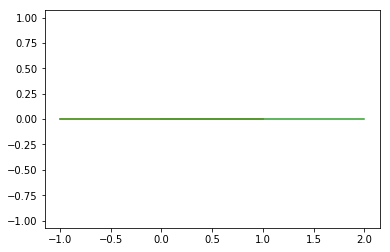

num iters:29
q
array([[ 0.9961947 ],
       [ 0.08715567],
       [-0.94785518],
       [ 0.55691096],
       [ 0.08726639]])


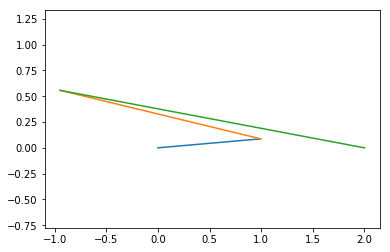

num iters:5
q
array([[ 0.98480778],
       [ 0.17364803],
       [-0.80145969],
       [ 1.07323045],
       [ 0.17453278]])


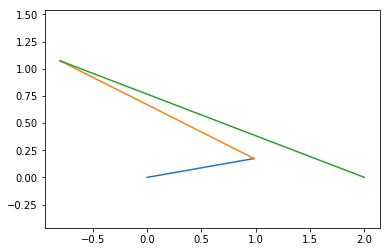

num iters:5
q
array([[ 0.96592588],
       [ 0.25881883],
       [-0.58674169],
       [ 1.51946288],
       [ 0.26179917]])


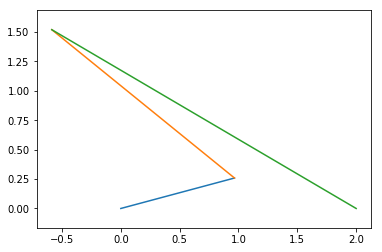

num iters:5
q
array([[ 0.93969272],
       [ 0.34201987],
       [-0.33591846],
       [ 1.88241466],
       [ 0.34906556]])


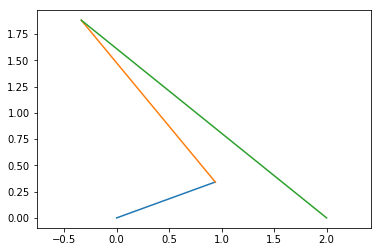

num iters:5
q
array([[ 0.90630794],
       [ 0.42261793],
       [-0.07835263],
       [ 2.16343485],
       [ 0.43633194]])


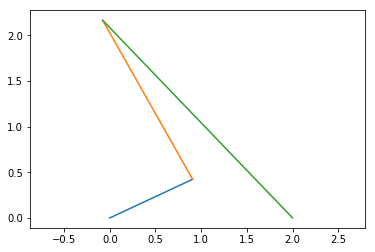

num iters:5
q
array([[0.86602562],
       [0.49999962],
       [0.16442019],
       [2.37289839],
       [0.52359833]])


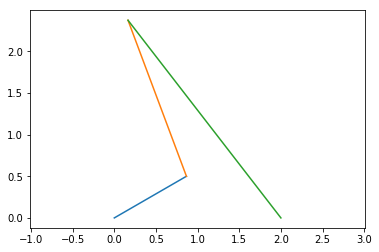

num iters:5
q
array([[0.81915234],
       [0.57357601],
       [0.37945185],
       [2.52464328],
       [0.61086472]])


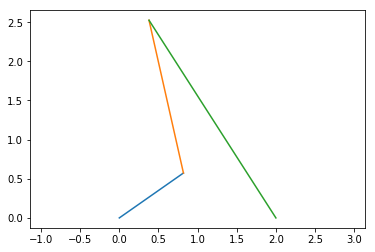

num iters:5
q
array([[0.76604482],
       [0.64278716],
       [0.56076595],
       [2.63222441],
       [0.69813111]])


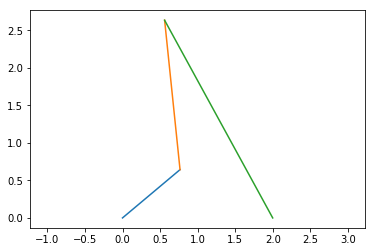

num iters:5
q
array([[0.70710725],
       [0.70710631],
       [0.7071058 ],
       [2.70710631],
       [0.7853975 ]])


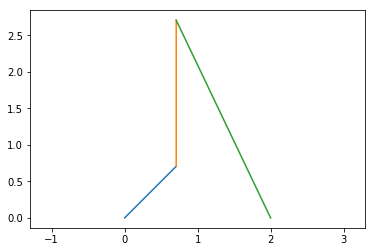

num iters:5
q
array([[0.64278817],
       [0.76604397],
       [0.81998003],
       [2.75817927],
       [0.87266389]])


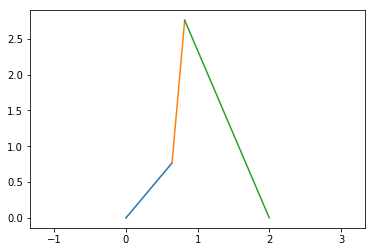

num iters:5
q
array([[0.5735771 ],
       [0.81915158],
       [0.9022811 ],
       [2.79195509],
       [0.95993028]])


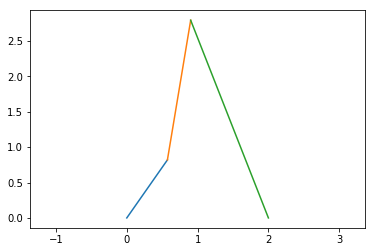

num iters:5
q
array([[0.50000077],
       [0.86602496],
       [0.95742667],
       [2.81301277],
       [1.04719667]])


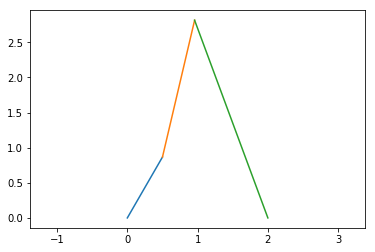

num iters:5
q
array([[0.42261913],
       [0.90630738],
       [0.98887881],
       [2.82447056],
       [1.13446306]])


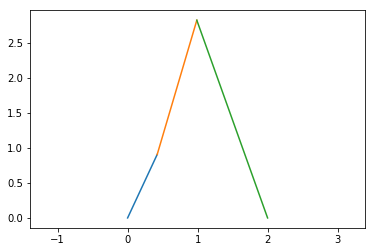

num iters:5
q
array([[0.34202111],
       [0.93969227],
       [0.99990361],
       [2.82839304],
       [1.22172944]])


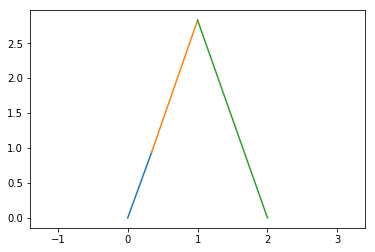

num iters:5
q
array([[0.25882011],
       [0.96592554],
       [0.99347128],
       [2.82611039],
       [1.30899583]])


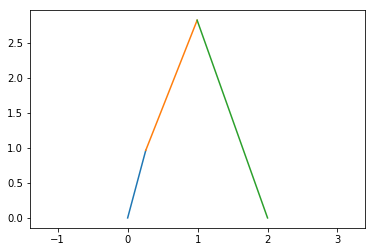

num iters:4
q
array([[0.17364934],
       [0.98480755],
       [0.97223197],
       [2.81845576],
       [1.39626222]])


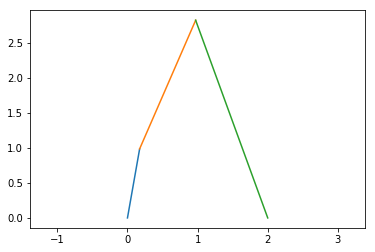

num iters:4
q
array([[0.08715699],
       [0.99619459],
       [0.93852904],
       [2.80593646],
       [1.48352861]])


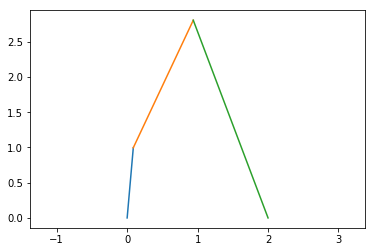

num iters:4
q
array([[1.32679490e-06],
       [1.00000000e+00],
       [8.94427931e-01],
       [2.78885468e+00],
       [1.57079500e+00]])


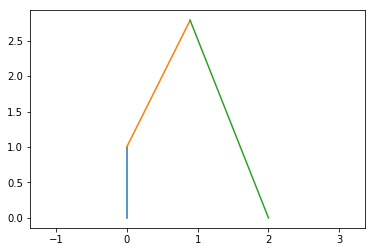

num iters:4
q
array([[-0.08715435],
       [ 0.99619482],
       [ 0.84174948],
       [ 2.7673915 ],
       [ 1.65806139]])


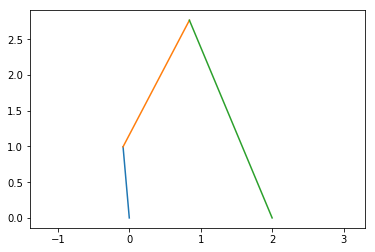

num iters:4
q
array([[-0.17364673],
       [ 0.98480801],
       [ 0.78210185],
       [ 2.74166448],
       [ 1.74532778]])


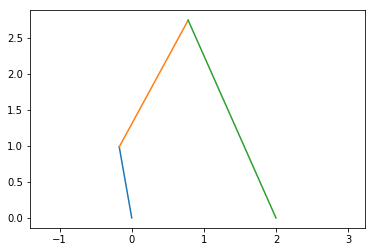

num iters:4
q
array([[-0.25881755],
       [ 0.96592623],
       [ 0.71690886],
       [ 2.71176642],
       [ 1.83259417]])


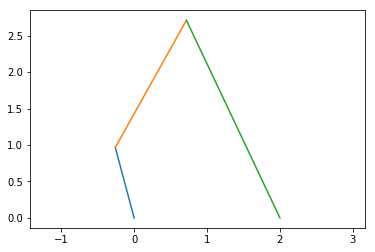

num iters:4
q
array([[-0.34201862],
       [ 0.93969318],
       [ 0.64743376],
       [ 2.67779098],
       [ 1.91986056]])


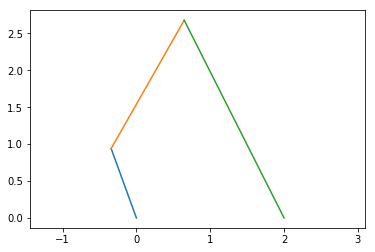

num iters:4
q
array([[-0.42261673],
       [ 0.9063085 ],
       [ 0.57479891],
       [ 2.63984883],
       [ 2.00712694]])


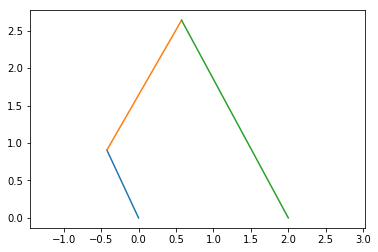

num iters:4
q
array([[-0.49999847],
       [ 0.86602629],
       [ 0.50000153],
       [ 2.5980771 ],
       [ 2.09439333]])


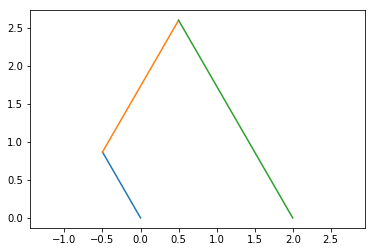

num iters:5
q
array([[-0.57357493],
       [ 0.8191531 ],
       [ 0.4239264 ],
       [ 2.55264412],
       [ 2.18165972]])


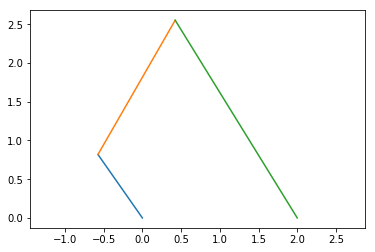

num iters:5
q
array([[-0.64278614],
       [ 0.76604568],
       [ 0.34735591],
       [ 2.50375069],
       [ 2.26892611]])


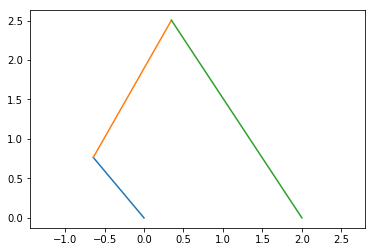

num iters:5
q
array([[-0.70710537],
       [ 0.70710819],
       [ 0.27097831],
       [ 2.45162884],
       [ 2.3561925 ]])


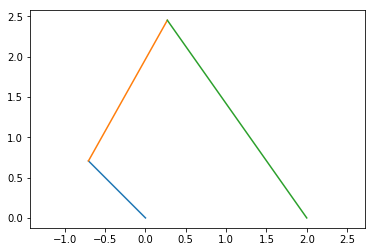

num iters:5
q
array([[-0.76604312],
       [ 0.64278919],
       [ 0.19539438],
       [ 2.39653887],
       [ 2.44345889]])


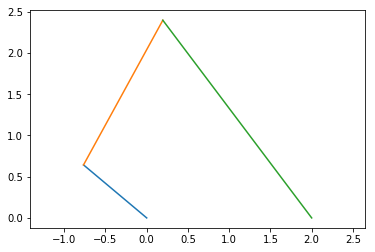

num iters:5
q
array([[-0.81915082],
       [ 0.57357819],
       [ 0.12112322],
       [ 2.33876507],
       [ 2.53072528]])


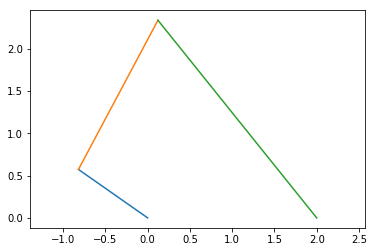

num iters:5
q
array([[-0.8660243 ],
       [ 0.50000192],
       [ 0.0486073 ],
       [ 2.27861065],
       [ 2.61799167]])


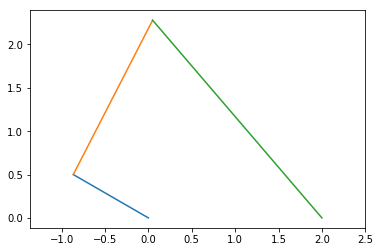

num iters:5
q
array([[-0.90630682],
       [ 0.42262033],
       [-0.02178284],
       [ 2.21639215],
       [ 2.70525806]])


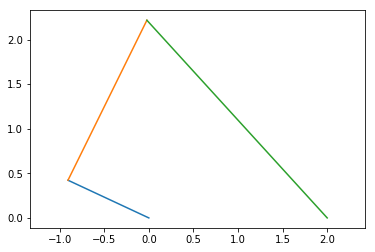

num iters:5
q
array([[-0.93969181],
       [ 0.34202236],
       [-0.08974397],
       [ 2.15243354],
       [ 2.79252444]])


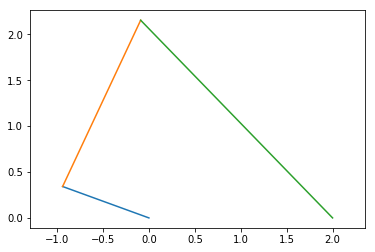

num iters:5
q
array([[-0.9659252 ],
       [ 0.25882139],
       [-0.15503564],
       [ 2.08706047],
       [ 2.87979083]])


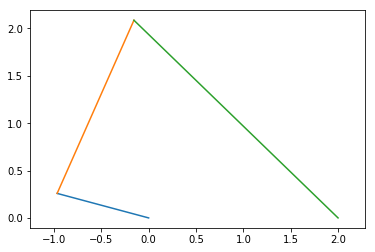

num iters:5
q
array([[-0.98480732],
       [ 0.17365065],
       [-0.21747549],
       [ 2.02059457],
       [ 2.96705722]])


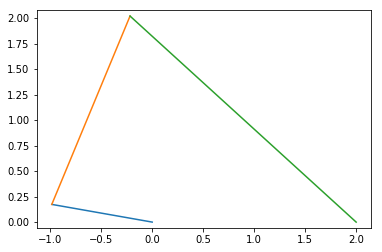

num iters:6
q
array([[-0.99619447],
       [ 0.08715831],
       [-0.27693445],
       [ 1.95334829],
       [ 3.05432361]])


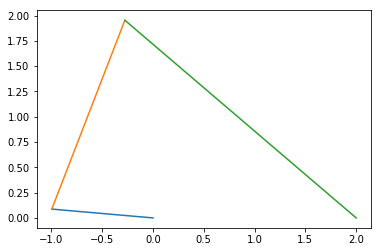

num iters:19
q
array([[-1.00000000e+00],
       [ 2.65358200e-06],
       [-3.33331665e-01],
       [ 1.88562015e+00],
       [ 3.14159000e+00]])


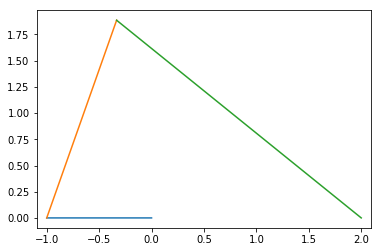

num iters:20
q
array([[-0.99619494],
       [ 0.08715303],
       [-0.27693797],
       [ 1.95334418],
       [ 3.22885639]])


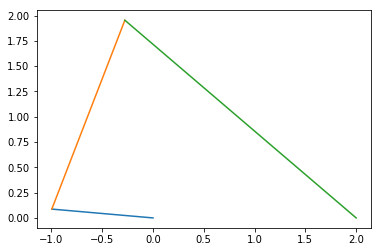

num iters:6
q
array([[-0.98480824],
       [ 0.17364542],
       [-0.2174792 ],
       [ 2.0205905 ],
       [ 3.31612278]])


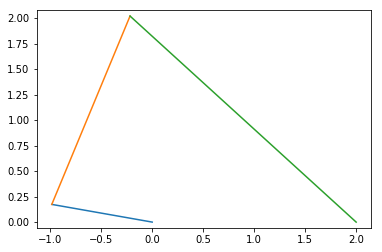

num iters:5
q
array([[-0.96592657],
       [ 0.25881627],
       [-0.15503952],
       [ 2.08705646],
       [ 3.40338917]])


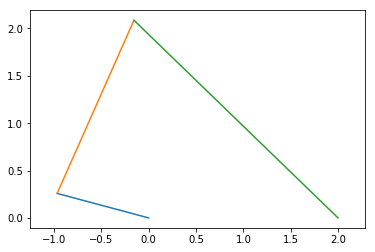

num iters:5
q
array([[-0.93969363],
       [ 0.34201737],
       [-0.08974802],
       [ 2.15242961],
       [ 3.49065556]])


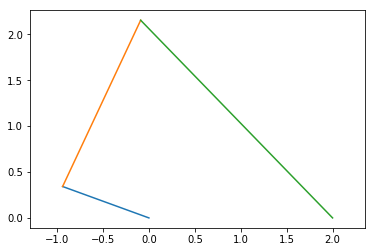

num iters:5
q
array([[-0.90630906],
       [ 0.42261552],
       [-0.02178705],
       [ 2.21638831],
       [ 3.57792194]])


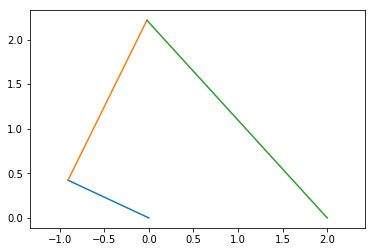

num iters:5
q
array([[-0.86602695],
       [ 0.49999732],
       [ 0.04860295],
       [ 2.27860693],
       [ 3.66518833]])


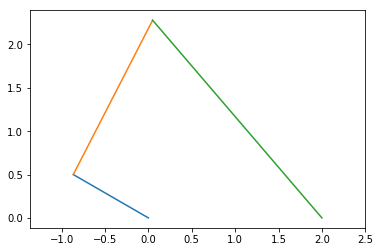

num iters:5
q
array([[-0.81915386],
       [ 0.57357384],
       [ 0.12111875],
       [ 2.33876148],
       [ 3.75245472]])


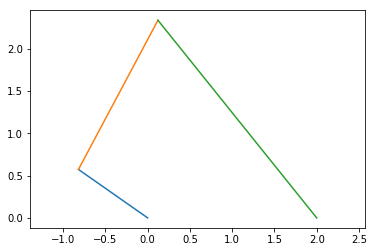

num iters:5
q
array([[-0.76604653],
       [ 0.64278513],
       [ 0.19538982],
       [ 2.39653544],
       [ 3.83972111]])


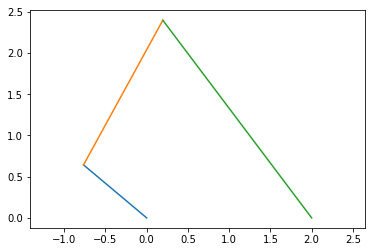

num iters:5
q
array([[-0.70710913],
       [ 0.70710444],
       [ 0.27097368],
       [ 2.45162558],
       [ 3.9269875 ]])


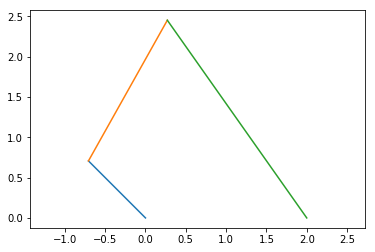

num iters:5
q
array([[-0.64279021],
       [ 0.76604226],
       [ 0.34735125],
       [ 2.50374762],
       [ 4.01425389]])


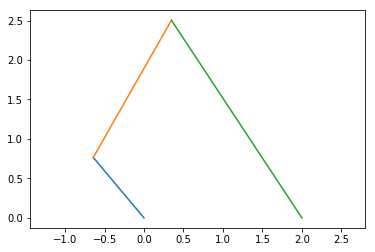

num iters:5
q
array([[-0.57357927],
       [ 0.81915006],
       [ 0.42392175],
       [ 2.55264125],
       [ 4.10152028]])


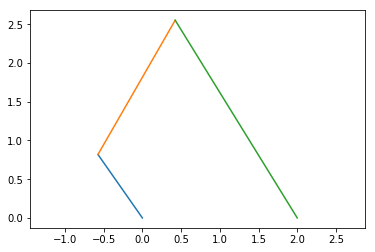

num iters:5
q
array([[-0.50000306],
       [ 0.86602363],
       [ 0.49999694],
       [ 2.59807444],
       [ 4.18878667]])


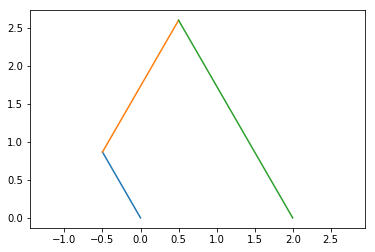

num iters:5
q
array([[-0.42262154],
       [ 0.90630626],
       [ 0.57479441],
       [ 2.6398464 ],
       [ 4.27605306]])


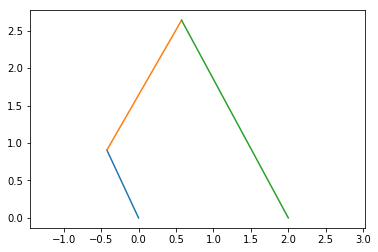

num iters:4
q
array([[-0.34202361],
       [ 0.93969136],
       [ 0.64742942],
       [ 2.6777888 ],
       [ 4.36331944]])


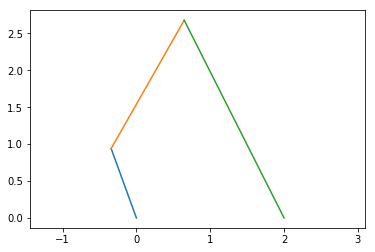

num iters:4
q
array([[-0.25882268],
       [ 0.96592485],
       [ 0.71690475],
       [ 2.71176448],
       [ 4.45058583]])


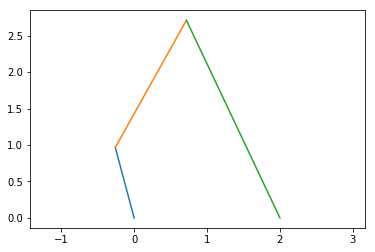

num iters:4
q
array([[-0.17365195],
       [ 0.98480709],
       [ 0.78209804],
       [ 2.74166279],
       [ 4.53785222]])


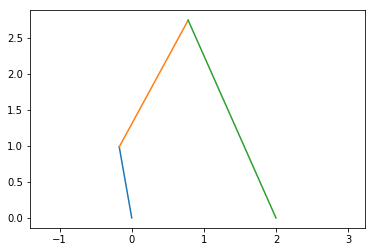

num iters:4
q
array([[-0.08715963],
       [ 0.99619436],
       [ 0.84174605],
       [ 2.76739007],
       [ 4.62511861]])


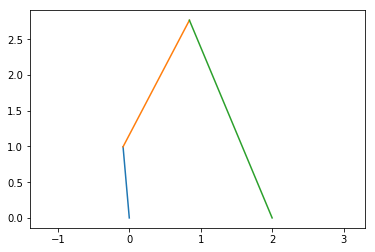

num iters:4
q
array([[-3.98038469e-06],
       [ 1.00000000e+00],
       [ 8.94424971e-01],
       [ 2.78885350e+00],
       [ 4.71238500e+00]])


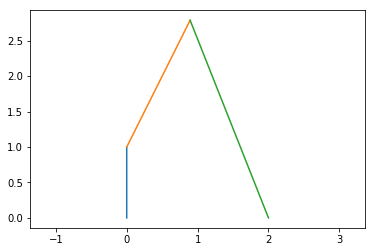

num iters:4
q
array([[0.0871517 ],
       [0.99619505],
       [0.93852666],
       [2.80593556],
       [4.79965139]])


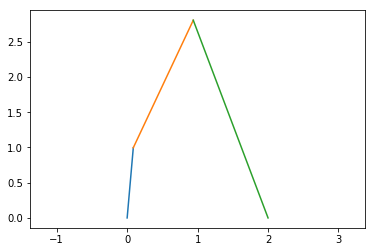

num iters:4
q
array([[0.17364411],
       [0.98480847],
       [0.97223028],
       [2.81845515],
       [4.88691778]])


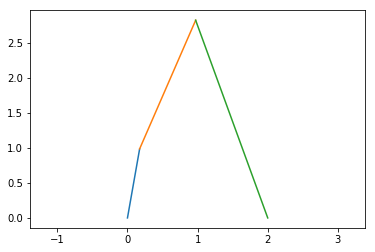

num iters:4
q
array([[0.25881499],
       [0.96592691],
       [0.99347041],
       [2.82611008],
       [4.97418417]])


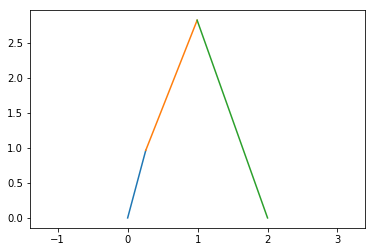

num iters:5
q
array([[0.34201613],
       [0.93969408],
       [0.99990372],
       [2.82839308],
       [5.06145056]])


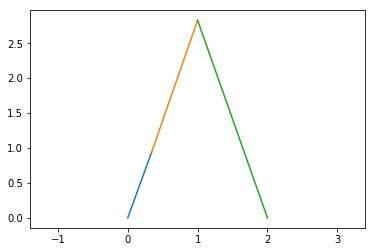

num iters:5
q
array([[0.42261432],
       [0.90630962],
       [0.98888007],
       [2.82447101],
       [5.14871694]])


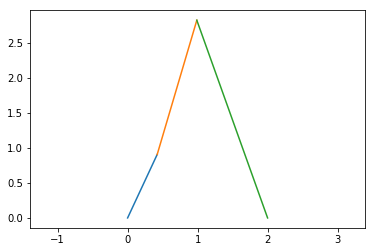

num iters:5
q
array([[0.49999617],
       [0.86602762],
       [0.95742927],
       [2.81301374],
       [5.23598333]])


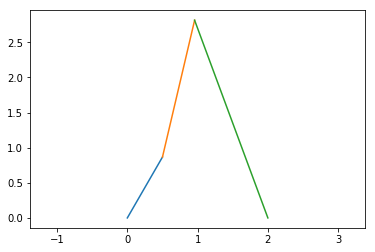

num iters:5
q
array([[0.57357275],
       [0.81915462],
       [0.90228524],
       [2.79195672],
       [5.32324972]])


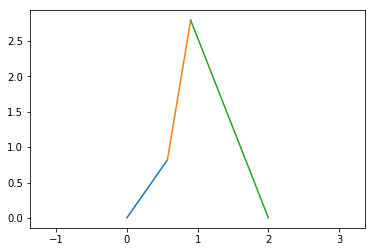

num iters:5
q
array([[0.64278411],
       [0.76604738],
       [0.81998593],
       [2.75818179],
       [5.41051611]])


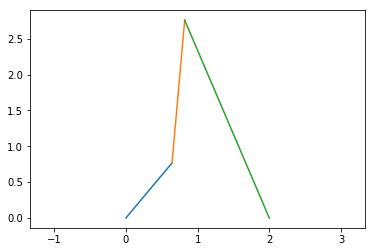

num iters:5
q
array([[0.7071035 ],
       [0.70711006],
       [0.70711366],
       [2.70711006],
       [5.4977825 ]])


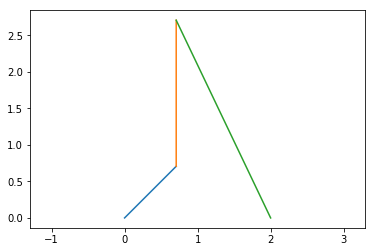

num iters:8
q
array([[ 0.76604141],
       [-0.64279122],
       [-0.98188371],
       [ 0.32919528],
       [ 5.58504889]])


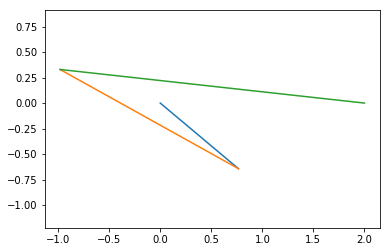

num iters:5
q
array([[ 0.8191493 ],
       [-0.57358036],
       [-0.98624238],
       [ 0.28697811],
       [ 5.67231528]])


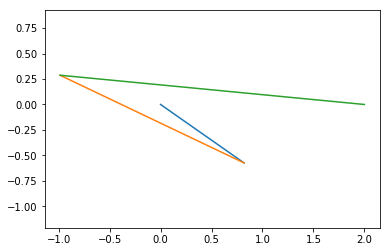

num iters:5
q
array([[ 0.86602297],
       [-0.50000421],
       [-0.98996354],
       [ 0.24518976],
       [ 5.75958167]])


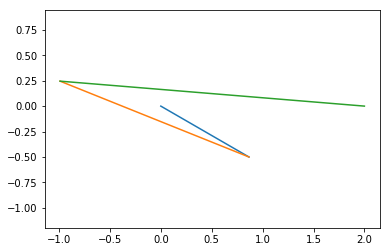

num iters:4
q
array([[ 0.9063057 ],
       [-0.42262274],
       [-0.99307178],
       [ 0.20376788],
       [ 5.84684806]])


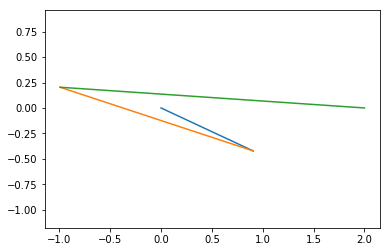

num iters:5
q
array([[ 0.93969091],
       [-0.34202485],
       [-0.99558755],
       [ 0.16265057],
       [ 5.93411444]])


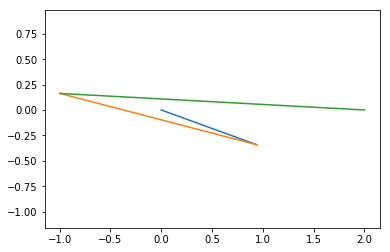

num iters:5
q
array([[ 0.96592451],
       [-0.25882396],
       [-0.9975274 ],
       [ 0.12177635],
       [ 6.02138083]])


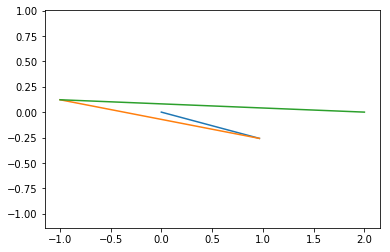

num iters:5
q
array([[ 0.98480686],
       [-0.17365326],
       [-0.99890403],
       [ 0.08108411],
       [ 6.10864722]])


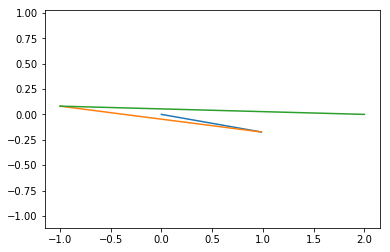

num iters:5
q
array([[ 0.99619424],
       [-0.08716096],
       [-0.99972644],
       [ 0.04051302],
       [ 6.19591361]])


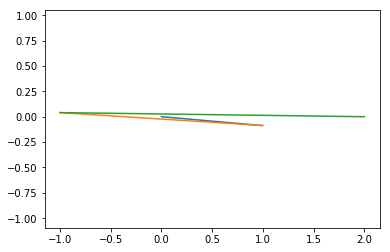

num iters:20
q
array([[ 1.00000000e+00],
       [-5.30717959e-06],
       [-1.00000000e+00],
       [ 2.46312878e-06],
       [ 6.28318000e+00]])


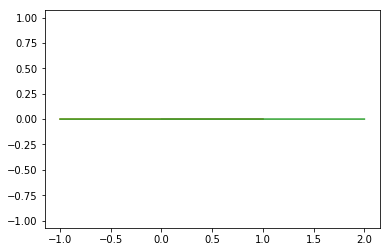

num iters:5
q
array([[ 0.99619517],
       [ 0.08715038],
       [-0.9997265 ],
       [-0.04050809],
       [ 6.37044639]])


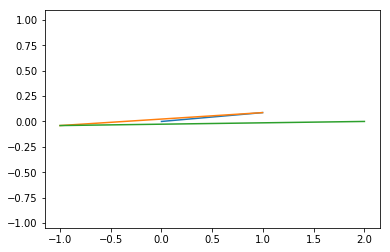

num iters:5
q
array([[ 0.9848087 ],
       [ 0.17364281],
       [-0.99890416],
       [-0.08107917],
       [ 6.45771278]])


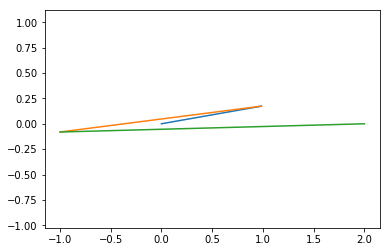

num iters:5
q
array([[ 0.96592726],
       [ 0.25881371],
       [-0.9975276 ],
       [-0.12177139],
       [ 6.54497917]])


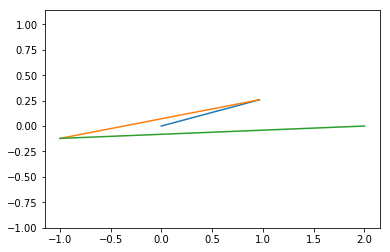

num iters:4
q
array([[ 0.93969454],
       [ 0.34201488],
       [-0.99558782],
       [-0.16264558],
       [ 6.63224556]])


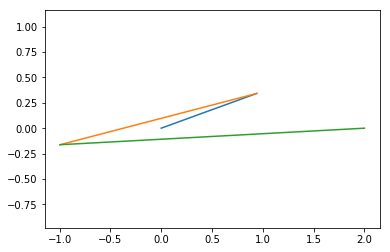

num iters:4
q
array([[ 0.90631019],
       [ 0.42261312],
       [-0.99307212],
       [-0.20376286],
       [ 6.71951194]])


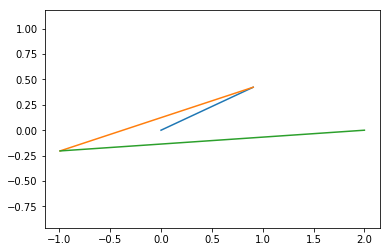

num iters:4
q
array([[ 0.86602828],
       [ 0.49999502],
       [-0.98996396],
       [-0.24518471],
       [ 6.80677833]])


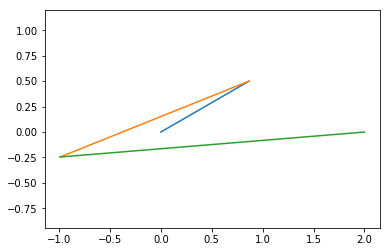

num iters:4
q
array([[ 0.81915538],
       [ 0.57357167],
       [-0.98624287],
       [-0.28697301],
       [ 6.89404472]])


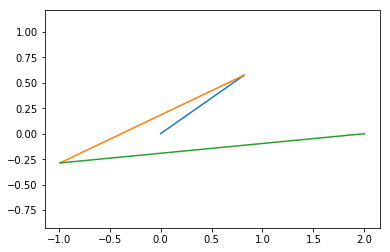

num iters:5
q
array([[ 0.76604823],
       [ 0.64278309],
       [-0.98188428],
       [-0.32919012],
       [ 6.98131111]])


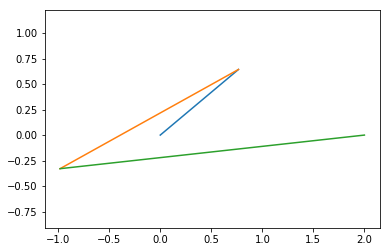

num iters:5
q
array([[ 0.707111  ],
       [ 0.70710256],
       [-0.97685929],
       [-0.37189885],
       [ 7.0685775 ]])


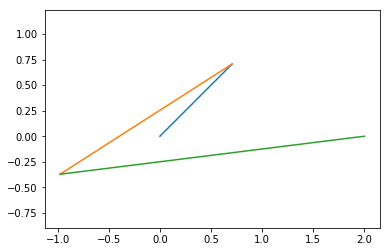

num iters:5
q
array([[ 0.64279224],
       [ 0.76604056],
       [-0.97113449],
       [-0.41516244],
       [ 7.15584389]])


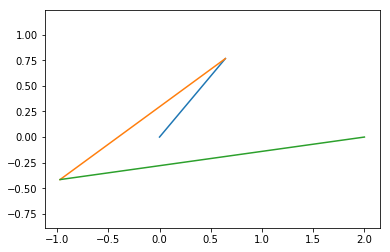

num iters:5
q
array([[ 0.57358145],
       [ 0.81914854],
       [-0.96467168],
       [-0.45904445],
       [ 7.24311028]])


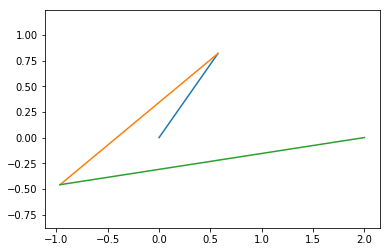

num iters:5
q
array([[ 0.50000536],
       [ 0.86602231],
       [-0.95742765],
       [-0.50360867],
       [ 7.33037667]])


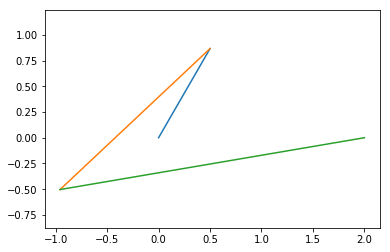

num iters:4
q
array([[ 0.42262394],
       [ 0.90630514],
       [-0.94935384],
       [-0.54891889],
       [ 7.41764306]])


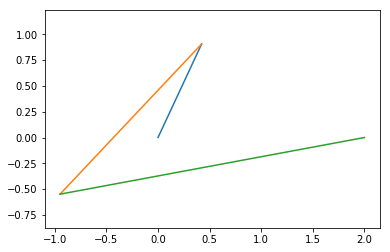

num iters:4
q
array([[ 0.3420261 ],
       [ 0.93969045],
       [-0.94039606],
       [-0.59503864],
       [ 7.50490944]])


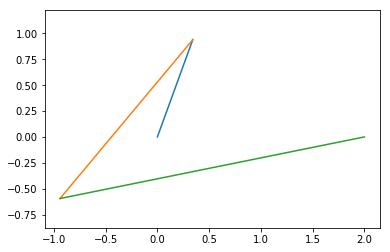

num iters:4
q
array([[ 0.25882524],
       [ 0.96592417],
       [-0.93049423],
       [-0.64203081],
       [ 7.59217583]])


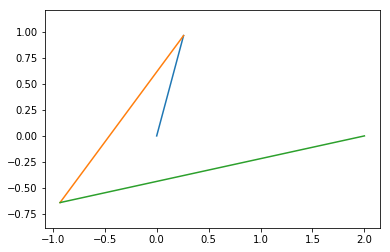

num iters:4
q
array([[ 0.17365457],
       [ 0.98480663],
       [-0.91958201],
       [-0.68995718],
       [ 7.67944222]])


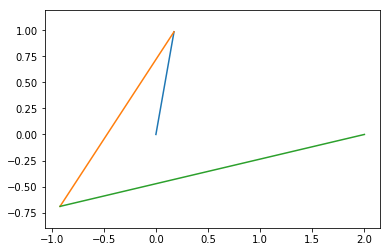

num iters:4
q
array([[ 0.08716228],
       [ 0.99619413],
       [-0.90758654],
       [-0.73887785],
       [ 7.76670861]])


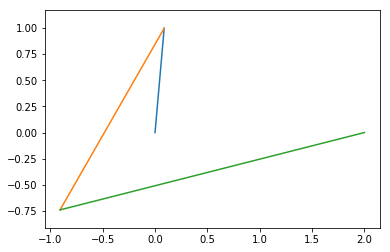

num iters:4
q
array([[ 6.63397448e-06],
       [ 1.00000000e+00],
       [-8.94428238e-01],
       [-7.88850542e-01],
       [ 7.85397500e+00]])


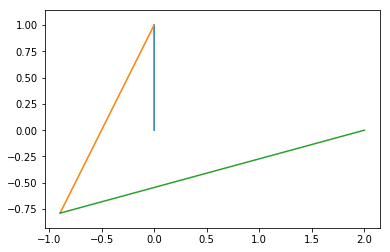

num iters:4
q
array([[-0.08714906],
       [ 0.99619528],
       [-0.88002051],
       [-0.83992968],
       [ 7.94124139]])


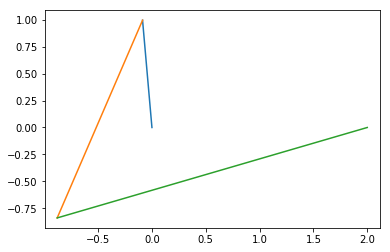

num iters:4
q
array([[-0.1736415 ],
       [ 0.98480893],
       [-0.86426969],
       [-0.89216542],
       [ 8.02850778]])


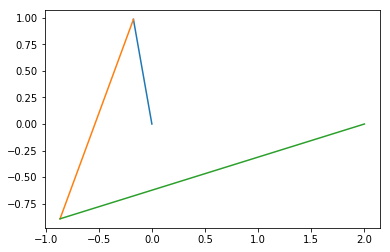

num iters:4
q
array([[-0.25881242],
       [ 0.9659276 ],
       [-0.84707499],
       [-0.94560246],
       [ 8.11577417]])


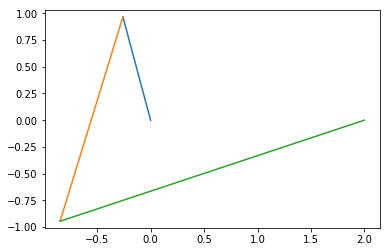

num iters:4
q
array([[-0.34201363],
       [ 0.93969499],
       [-0.82832859],
       [-1.00027866],
       [ 8.20304056]])


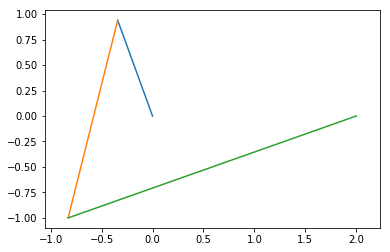

num iters:4
q
array([[-0.42261192],
       [ 0.90631075],
       [-0.80791592],
       [-1.05622354],
       [ 8.29030694]])


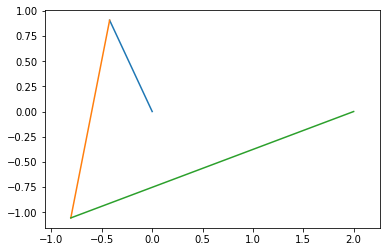

num iters:4
q
array([[-0.49999387],
       [ 0.86602894],
       [-0.78571616],
       [-1.11345654],
       [ 8.37757333]])


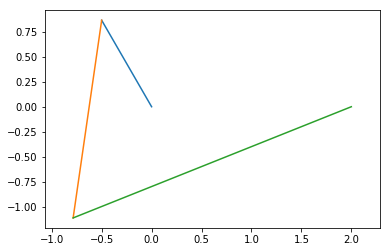

num iters:5
q
array([[-0.57357058],
       [ 0.81915615],
       [-0.76160292],
       [-1.1719852 ],
       [ 8.46483972]])


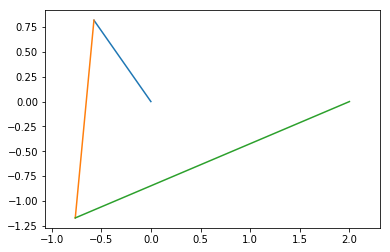

num iters:5
q
array([[-0.64278208],
       [ 0.76604909],
       [-0.73544531],
       [-1.23180314],
       [ 8.55210611]])


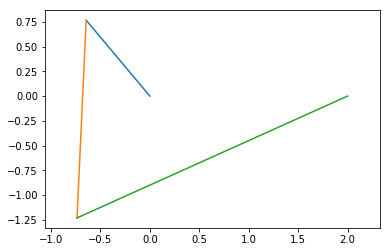

num iters:5
q
array([[-0.70710162],
       [ 0.70711194],
       [-0.70710925],
       [-1.29288806],
       [ 8.6393725 ]])


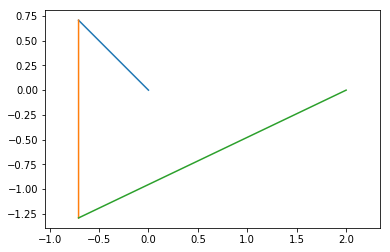

num iters:5
q
array([[-0.76603971],
       [ 0.64279326],
       [-0.67645925],
       [-1.35519957],
       [ 8.72663889]])


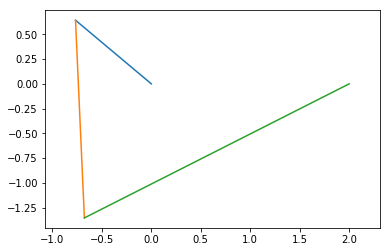

num iters:5
q
array([[-0.81914777],
       [ 0.57358253],
       [-0.64336055],
       [-1.4186772 ],
       [ 8.81390528]])


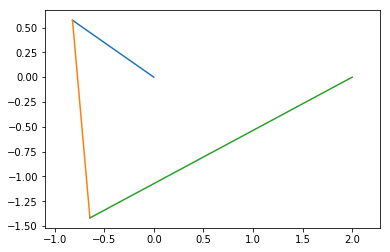

num iters:5
q
array([[-0.86602164],
       [ 0.50000651],
       [-0.60768169],
       [-1.48323842],
       [ 8.90117167]])


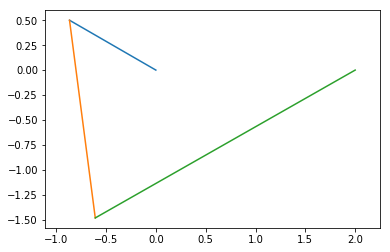

num iters:5
q
array([[-0.90630458],
       [ 0.42262514],
       [-0.56929755],
       [-1.54877696],
       [ 8.98843806]])


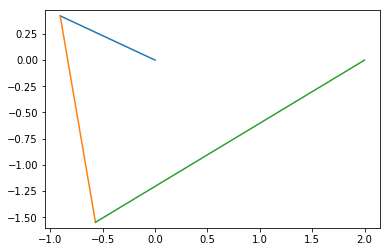

num iters:5
q
array([[-0.93969   ],
       [ 0.34202735],
       [-0.52809288],
       [-1.61516141],
       [ 9.07570444]])


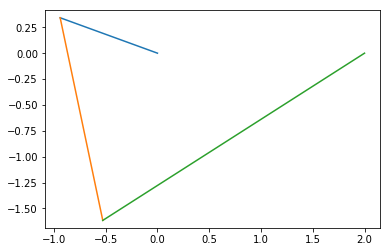

num iters:5
q
array([[-0.96592382],
       [ 0.25882652],
       [-0.48396618],
       [-1.68223423],
       [ 9.16297083]])


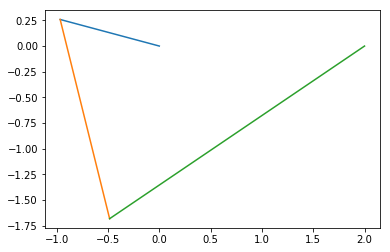

num iters:5
q
array([[-0.9848064 ],
       [ 0.17365587],
       [-0.43683404],
       [-1.74981139],
       [ 9.25023722]])


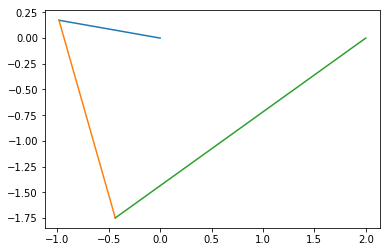

num iters:6
q
array([[-0.99619401],
       [ 0.0871636 ],
       [-0.38663576],
       [-1.81768252],
       [ 9.33750361]])


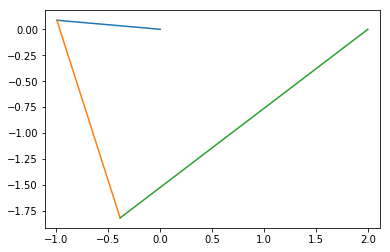

num iters:18
q
array([[-1.00000000e+00],
       [ 7.96076481e-06],
       [-3.33338337e-01],
       [-1.88561189e+00],
       [ 9.42477000e+00]])


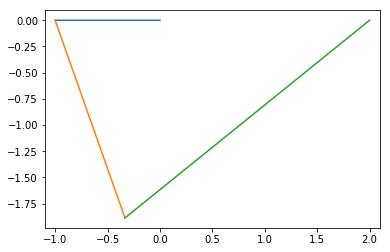

num iters:18
q
array([[-0.9961954 ],
       [ 0.08714774],
       [-0.38662632],
       [-1.81769492],
       [ 9.51203639]])


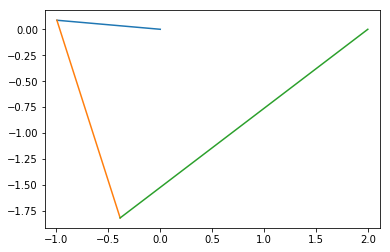

num iters:6
q
array([[-0.98480916],
       [ 0.17364019],
       [-0.43682516],
       [-1.74982375],
       [ 9.59930278]])


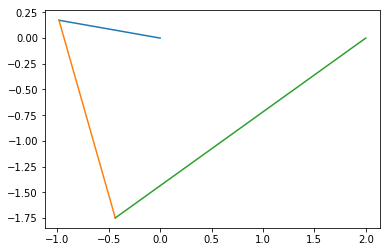

num iters:5
q
array([[-0.96592794],
       [ 0.25881114],
       [-0.48395786],
       [-1.68224652],
       [ 9.68656917]])


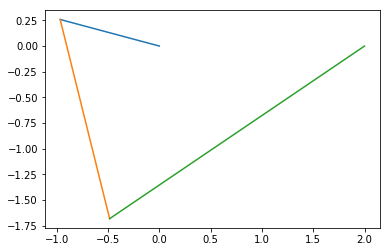

num iters:5
q
array([[-0.93969544],
       [ 0.34201239],
       [-0.5280851 ],
       [-1.61517359],
       [ 9.77383556]])


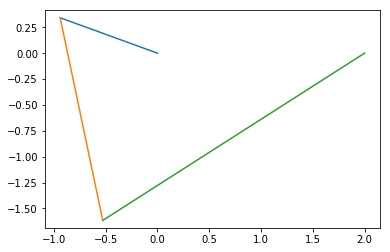

num iters:5
q
array([[-0.90631131],
       [ 0.42261071],
       [-0.5692903 ],
       [-1.548789  ],
       [ 9.86110194]])


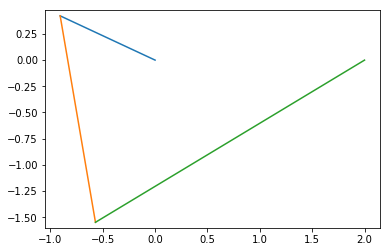

num iters:5
q
array([[-0.86602961],
       [ 0.49999272],
       [-0.60767493],
       [-1.48325029],
       [ 9.94836833]])


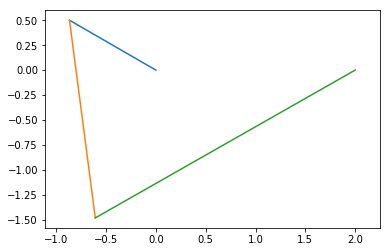

num iters:5
q
array([[-0.81915691],
       [ 0.57356949],
       [-0.64335428],
       [-1.41868888],
       [10.03563472]])


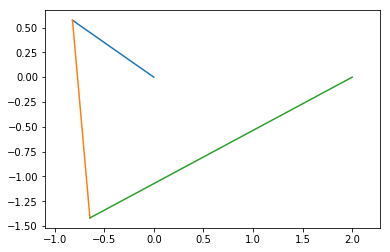

num iters:5
q
array([[-0.76604994],
       [ 0.64278106],
       [-0.67645344],
       [-1.35521105],
       [10.12290111]])


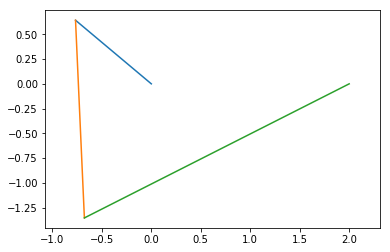

num iters:5
q
array([[-0.70711288],
       [ 0.70710068],
       [-0.70710387],
       [-1.29289932],
       [10.2101675 ]])


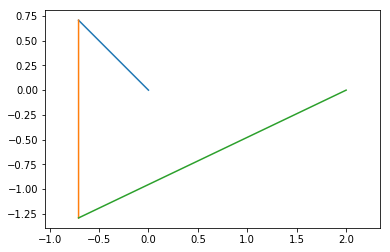

num iters:5
q
array([[-0.64279427],
       [ 0.76603885],
       [-0.73544034],
       [-1.23181417],
       [10.29743389]])


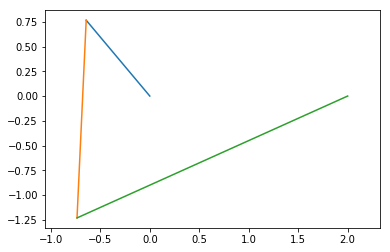

num iters:5
q
array([[-0.57358362],
       [ 0.81914701],
       [-0.76159834],
       [-1.17199599],
       [10.38470028]])


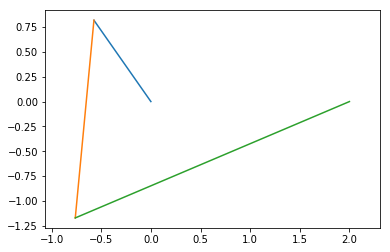

num iters:5
q
array([[-0.50000766],
       [ 0.86602098],
       [-0.78571194],
       [-1.1134671 ],
       [10.47196667]])


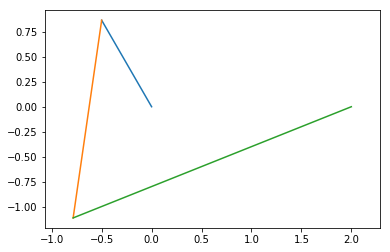

num iters:5
q
array([[-0.42262635],
       [ 0.90630402],
       [-0.80791204],
       [-1.05623386],
       [10.55923306]])


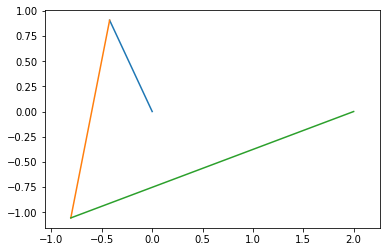

num iters:4
q
array([[-0.34202859],
       [ 0.93968955],
       [-0.82832502],
       [-1.00028875],
       [10.64649944]])


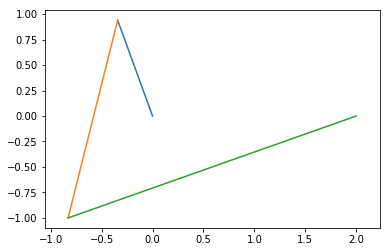

num iters:4
q
array([[-0.2588278 ],
       [ 0.96592348],
       [-0.84707171],
       [-0.94561232],
       [10.73376583]])


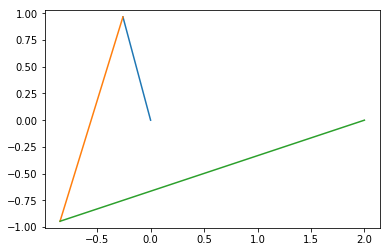

num iters:4
q
array([[-0.17365718],
       [ 0.98480617],
       [-0.86426669],
       [-0.89217506],
       [10.82103222]])


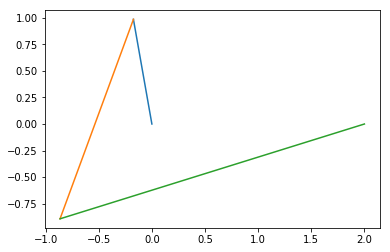

num iters:4
q
array([[-0.08716492],
       [ 0.9961939 ],
       [-0.88001776],
       [-0.8399391 ],
       [10.90829861]])


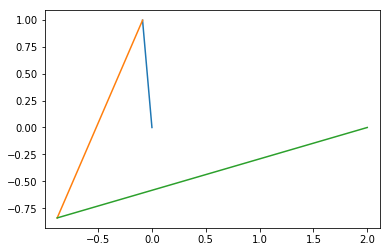

num iters:4
q
array([[-9.28756428e-06],
       [ 1.00000000e+00],
       [-8.94425726e-01],
       [-7.88859758e-01],
       [ 1.09955650e+01]])


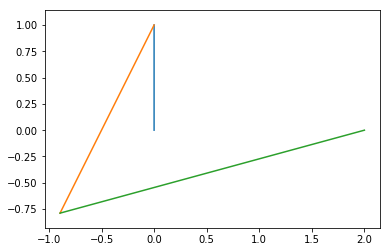

num iters:4
q
array([[ 0.08714642],
       [ 0.99619551],
       [-0.90758425],
       [-0.73888687],
       [11.08283139]])


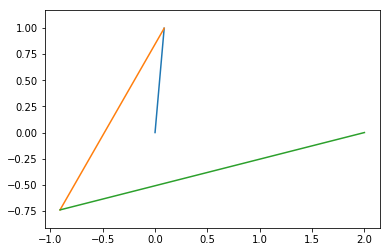

num iters:4
q
array([[ 0.17363889],
       [ 0.98480939],
       [-0.91957992],
       [-0.68996601],
       [11.17009778]])


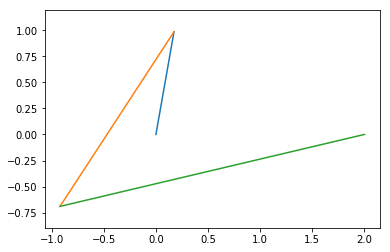

num iters:4
q
array([[ 0.25880986],
       [ 0.96592829],
       [-0.93049234],
       [-0.64203946],
       [11.25736417]])


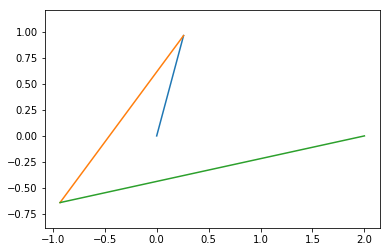

num iters:4
q
array([[ 0.34201114],
       [ 0.9396959 ],
       [-0.94039435],
       [-0.59504713],
       [11.34463056]])


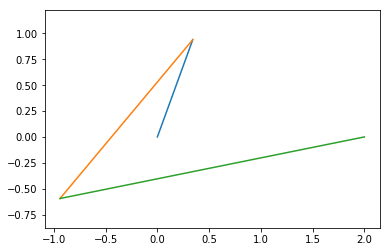

num iters:4
q
array([[ 0.42260951],
       [ 0.90631187],
       [-0.94935228],
       [-0.54892723],
       [11.43189694]])


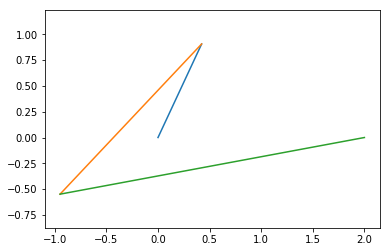

num iters:4
q
array([[ 0.49999157],
       [ 0.86603027],
       [-0.95742625],
       [-0.50361687],
       [11.51916333]])


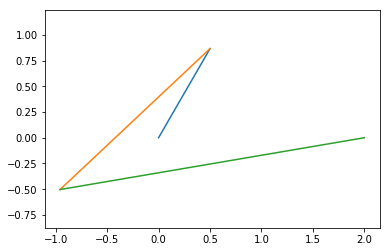

num iters:4
q
array([[ 0.57356841],
       [ 0.81915767],
       [-0.96467044],
       [-0.45905251],
       [11.60642972]])


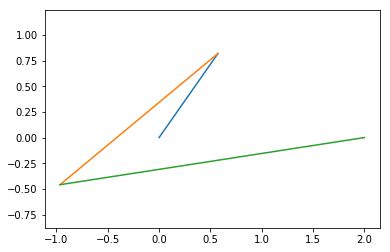

num iters:5
q
array([[ 0.64278004],
       [ 0.76605079],
       [-0.97113338],
       [-0.41517038],
       [11.69369611]])


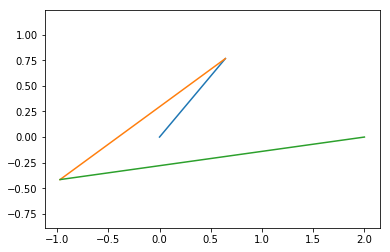

num iters:5
q
array([[ 0.70709974],
       [ 0.70711382],
       [-0.97685831],
       [-0.37190669],
       [11.7809625 ]])


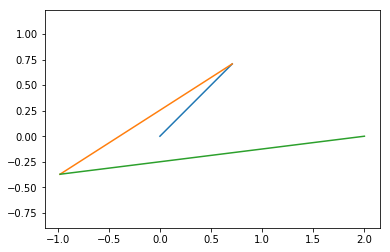

num iters:7
q
array([[ 0.766038  ],
       [-0.64279529],
       [-0.98188343],
       [ 0.32919786],
       [11.86822889]])


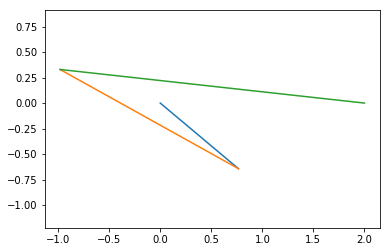

num iters:5
q
array([[ 0.81914625],
       [-0.57358471],
       [-0.98624214],
       [ 0.28698067],
       [11.95549528]])


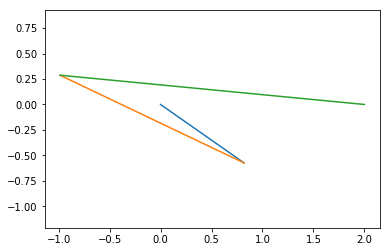

num iters:5
q
array([[ 0.86602032],
       [-0.50000881],
       [-0.98996333],
       [ 0.24519229],
       [12.04276167]])


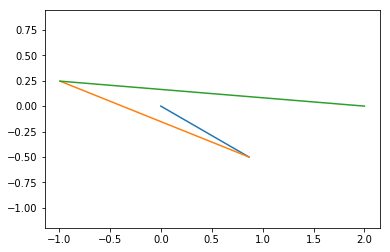

num iters:4
q
array([[ 0.90630346],
       [-0.42262755],
       [-0.9930716 ],
       [ 0.20377039],
       [12.13002806]])


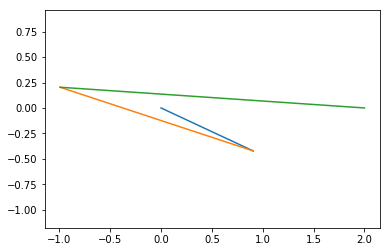

num iters:5
q
array([[ 0.93968909],
       [-0.34202984],
       [-0.99558742],
       [ 0.16265306],
       [12.21729444]])


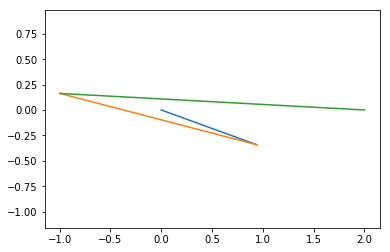

num iters:5
q
array([[ 0.96592314],
       [-0.25882908],
       [-0.9975273 ],
       [ 0.12177883],
       [12.30456083]])


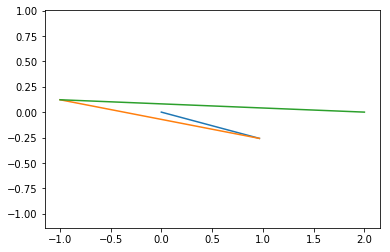

num iters:5
q
array([[ 0.98480594],
       [-0.17365849],
       [-0.99890396],
       [ 0.08108658],
       [12.39182722]])


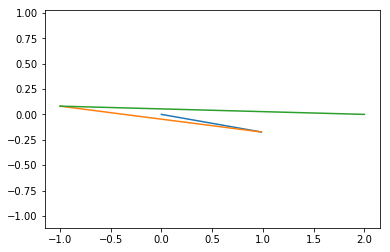

num iters:5
q
array([[ 0.99619378],
       [-0.08716624],
       [-0.9997264 ],
       [ 0.04051549],
       [12.47909361]])


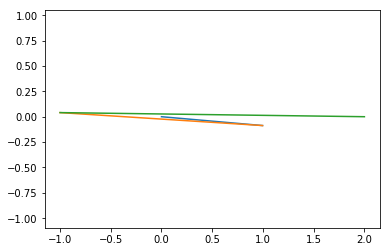

num iters:19
q
array([[ 1.00000000e+00],
       [-1.06143592e-05],
       [-1.00000000e+00],
       [ 4.92613325e-06],
       [ 1.25663600e+01]])


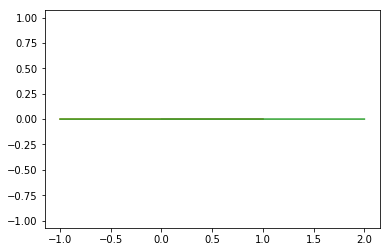

num iters:5
q
array([[ 0.99619563],
       [ 0.0871451 ],
       [-0.99972654],
       [-0.04050563],
       [12.65362639]])


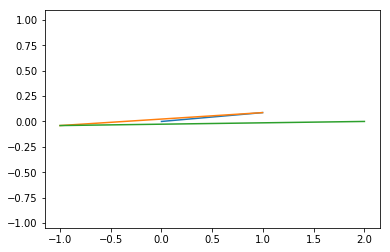

num iters:5
q
array([[ 0.98480962],
       [ 0.17363758],
       [-0.99890423],
       [-0.0810767 ],
       [12.74089278]])


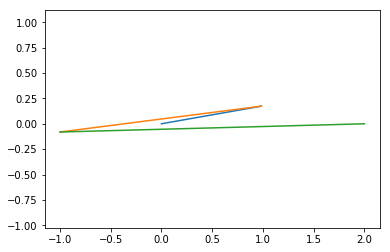

num iters:5
q
array([[ 0.96592863],
       [ 0.25880858],
       [-0.9975277 ],
       [-0.12176891],
       [12.82815917]])


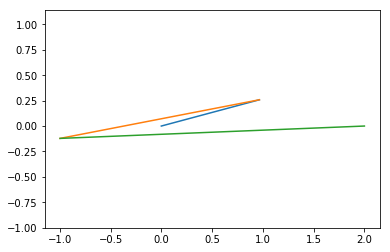

num iters:4
q
array([[ 0.93969635],
       [ 0.34200989],
       [-0.99558796],
       [-0.16264309],
       [12.91542556]])


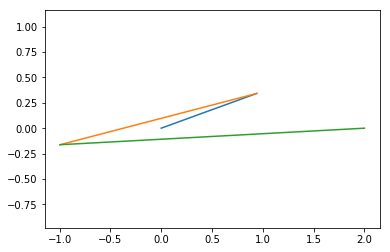

num iters:4
q
array([[ 0.90631243],
       [ 0.42260831],
       [-0.99307229],
       [-0.20376035],
       [13.00269194]])


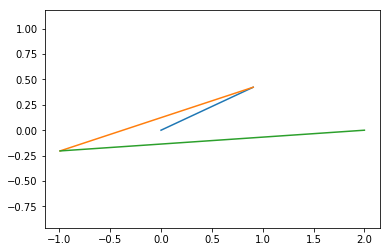

num iters:4
q
array([[ 0.86603093],
       [ 0.49999042],
       [-0.98996416],
       [-0.24518218],
       [13.08995833]])


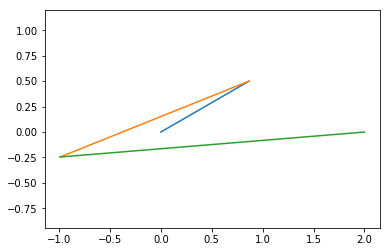

num iters:4
q
array([[ 0.81915843],
       [ 0.57356732],
       [-0.98624312],
       [-0.28697045],
       [13.17722472]])


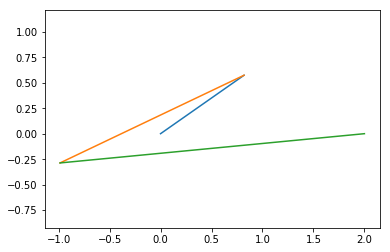

num iters:5
q
array([[ 0.76605164],
       [ 0.64277903],
       [-0.98188457],
       [-0.32918754],
       [13.26449111]])


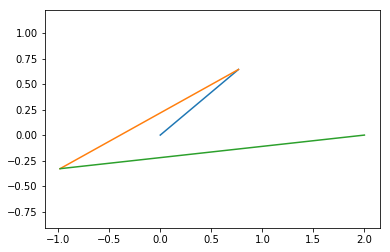

num iters:5
q
array([[ 0.70711476],
       [ 0.70709881],
       [-0.97685962],
       [-0.37189624],
       [13.3517575 ]])


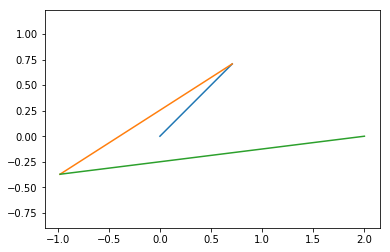

num iters:5
q
array([[ 0.64279631],
       [ 0.76603715],
       [-0.97113486],
       [-0.41515979],
       [13.43902389]])


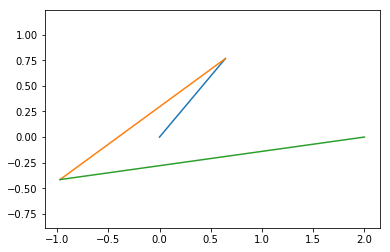

num iters:5
q
array([[ 0.5735858 ],
       [ 0.81914549],
       [-0.9646721 ],
       [-0.45904176],
       [13.52629028]])


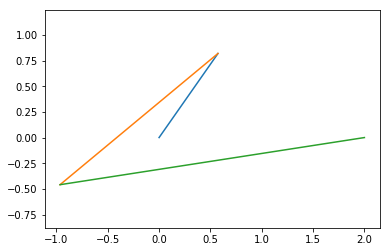

num iters:5
q
array([[ 0.50000996],
       [ 0.86601965],
       [-0.95742812],
       [-0.50360594],
       [13.61355667]])


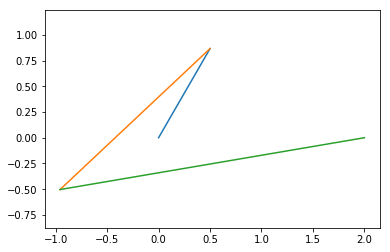

num iters:4
q
array([[ 0.42262875],
       [ 0.9063029 ],
       [-0.94935435],
       [-0.54891611],
       [13.70082306]])


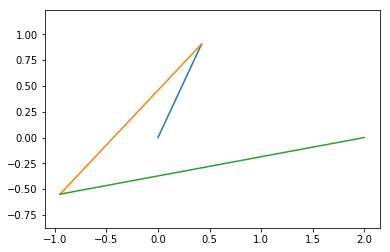

num iters:4
q
array([[ 0.34203109],
       [ 0.93968864],
       [-0.94039664],
       [-0.59503581],
       [13.78808944]])


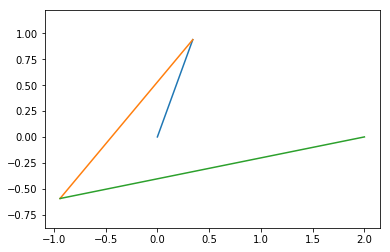

num iters:4
q
array([[ 0.25883037],
       [ 0.96592279],
       [-0.93049486],
       [-0.64202792],
       [13.87535583]])


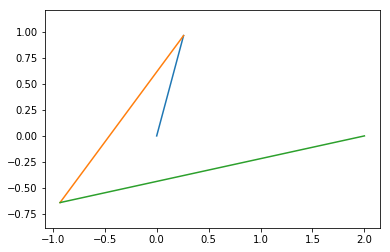

num iters:4
q
array([[ 0.17365979],
       [ 0.9848057 ],
       [-0.9195827 ],
       [-0.68995423],
       [13.96262222]])


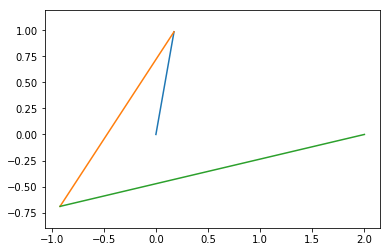

num iters:4
q
array([[ 0.08716757],
       [ 0.99619366],
       [-0.90758731],
       [-0.73887485],
       [14.04988861]])


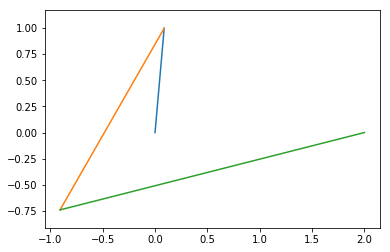

num iters:4
q
array([[ 1.19411541e-05],
       [ 1.00000000e+00],
       [-8.94429075e-01],
       [-7.88847469e-01],
       [ 1.41371550e+01]])


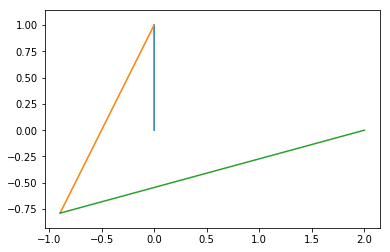

num iters:4
q
array([[-0.08714377],
       [ 0.99619575],
       [-0.88002143],
       [-0.83992654],
       [14.22442139]])


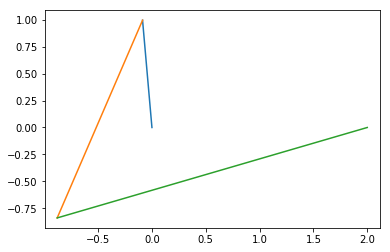

num iters:4
q
array([[-0.17363627],
       [ 0.98480985],
       [-0.86427069],
       [-0.8921622 ],
       [14.31168778]])


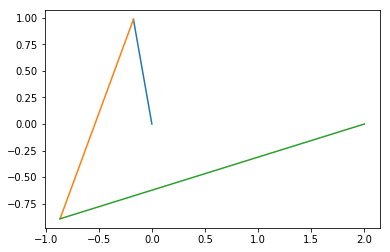

num iters:4
q
array([[-0.2588073 ],
       [ 0.96592897],
       [-0.84707608],
       [-0.94559917],
       [14.39895417]])


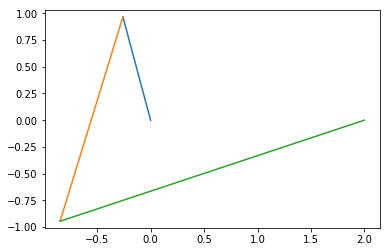

num iters:4
q
array([[-0.34200865],
       [ 0.93969681],
       [-0.82832978],
       [-1.0002753 ],
       [14.48622056]])


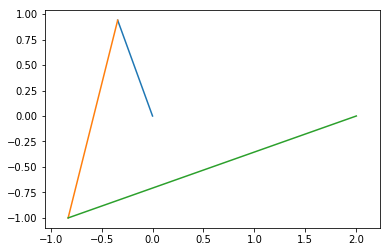

num iters:4
q
array([[-0.42260711],
       [ 0.90631299],
       [-0.80791722],
       [-1.0562201 ],
       [14.57348694]])


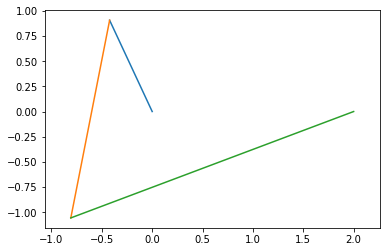

num iters:4
q
array([[-0.49998928],
       [ 0.8660316 ],
       [-0.78571757],
       [-1.11345302],
       [14.66075333]])


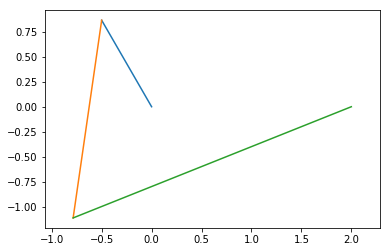

num iters:5
q
array([[-0.57356623],
       [ 0.81915919],
       [-0.76160445],
       [-1.1719816 ],
       [14.74801972]])


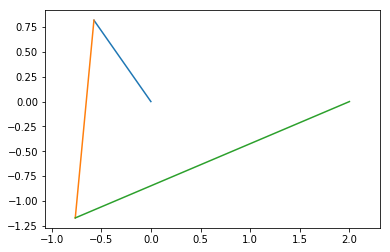

num iters:5
q
array([[-0.64277801],
       [ 0.7660525 ],
       [-0.73544696],
       [-1.23179947],
       [14.83528611]])


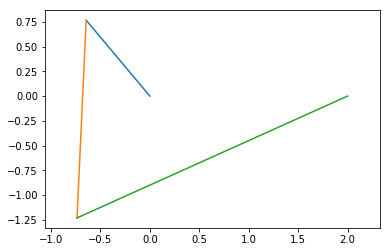

num iters:5
q
array([[-0.70709787],
       [ 0.70711569],
       [-0.70711104],
       [-1.29288431],
       [14.9225525 ]])


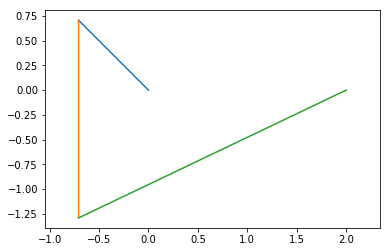

num iters:5
q
array([[-0.76603629],
       [ 0.64279732],
       [-0.67646119],
       [-1.35519575],
       [15.00981889]])


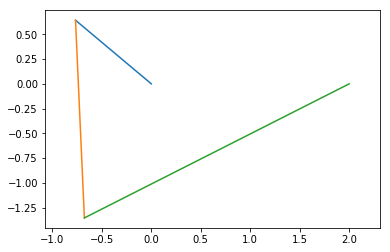

num iters:5
q
array([[-0.81914473],
       [ 0.57358688],
       [-0.64336264],
       [-1.41867331],
       [15.09708528]])


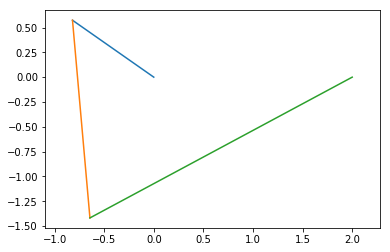

num iters:5
q
array([[-0.86601899],
       [ 0.50001111],
       [-0.60768394],
       [-1.48323447],
       [15.18435167]])


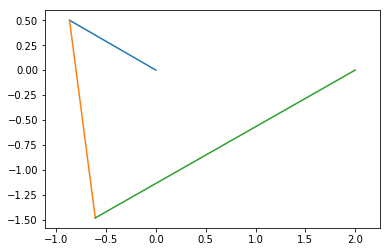

num iters:5
q
array([[-0.90630234],
       [ 0.42262995],
       [-0.56929997],
       [-1.54877295],
       [15.27161806]])


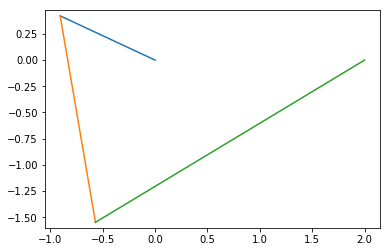

num iters:5
q
array([[-0.93968818],
       [ 0.34203233],
       [-0.52809548],
       [-1.61515735],
       [15.35888444]])


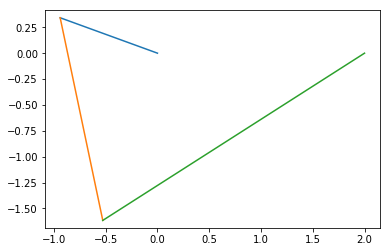

num iters:5
q
array([[-0.96592245],
       [ 0.25883165],
       [-0.48396896],
       [-1.68223013],
       [15.44615083]])


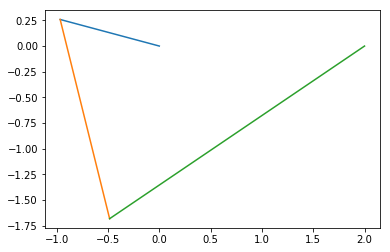

num iters:5
q
array([[-0.98480547],
       [ 0.1736611 ],
       [-0.43683699],
       [-1.74980726],
       [15.53341722]])


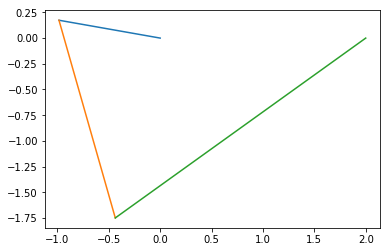

num iters:6
q
array([[-0.99619355],
       [ 0.08716889],
       [-0.38663891],
       [-1.81767839],
       [15.62068361]])


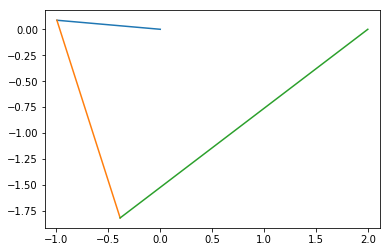

num iters:17
q
array([[-1.00000000e+00],
       [ 1.32679517e-05],
       [-3.33341673e-01],
       [-1.88560776e+00],
       [ 1.57079500e+01]])


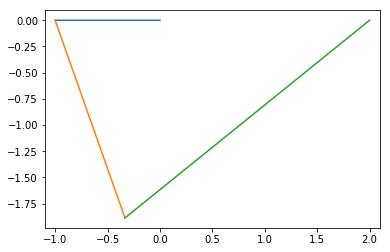

num iters:18
q
array([[-0.99619586],
       [ 0.08714245],
       [-0.38662317],
       [-1.81769905],
       [15.79521639]])


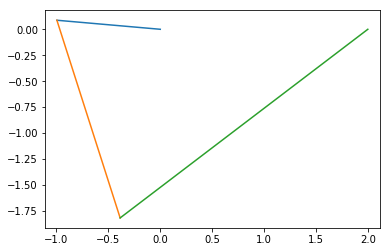

num iters:6
q
array([[-0.98481008],
       [ 0.17363497],
       [-0.4368222 ],
       [-1.74982787],
       [15.88248278]])


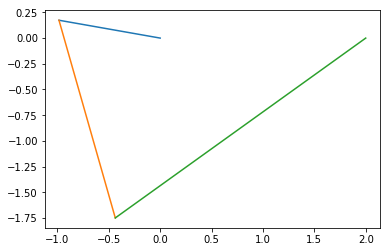

num iters:5
q
array([[-0.96592932],
       [ 0.25880602],
       [-0.48395509],
       [-1.68225061],
       [15.96974917]])


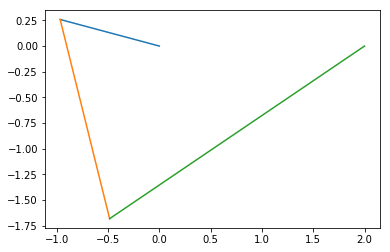

num iters:5
q
array([[-0.93969726],
       [ 0.3420074 ],
       [-0.52808251],
       [-1.61517765],
       [16.05701556]])


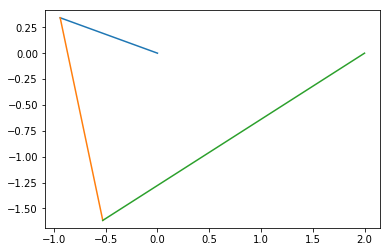

num iters:5
q
array([[-0.90631355],
       [ 0.4226059 ],
       [-0.56928788],
       [-1.54879302],
       [16.14428194]])


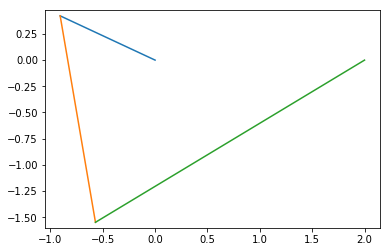

num iters:5
q
array([[-0.86603226],
       [ 0.49998813],
       [-0.60767268],
       [-1.48325425],
       [16.23154833]])


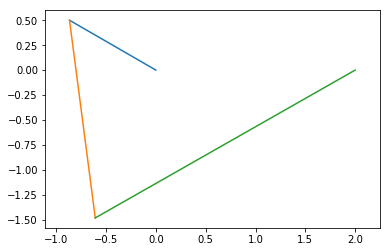

num iters:5
q
array([[-0.81915995],
       [ 0.57356515],
       [-0.64335219],
       [-1.41869278],
       [16.31881472]])


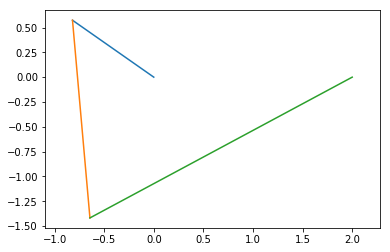

num iters:5
q
array([[-0.76605335],
       [ 0.64277699],
       [-0.6764515 ],
       [-1.35521487],
       [16.40608111]])


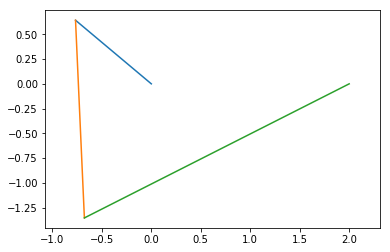

num iters:5
q
array([[-0.70711663],
       [ 0.70709693],
       [-0.70710208],
       [-1.29290307],
       [16.4933475 ]])


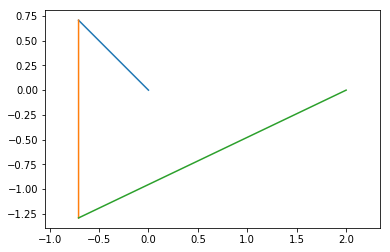

num iters:5
q
array([[-0.64279834],
       [ 0.76603544],
       [-0.73543868],
       [-1.23181785],
       [16.58061389]])


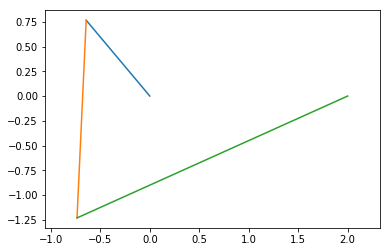

num iters:5
q
array([[-0.57358797],
       [ 0.81914397],
       [-0.76159681],
       [-1.17199959],
       [16.66788028]])


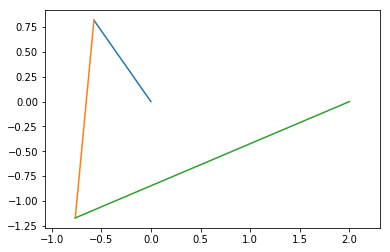

num iters:5
q
array([[-0.50001226],
       [ 0.86601833],
       [-0.78571053],
       [-1.11347062],
       [16.75514667]])


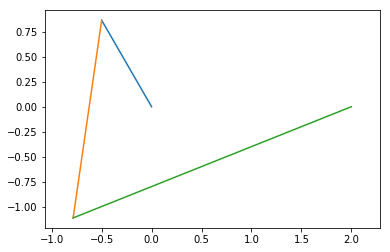

num iters:5
q
array([[-0.42263116],
       [ 0.90630177],
       [-0.80791075],
       [-1.0562373 ],
       [16.84241306]])


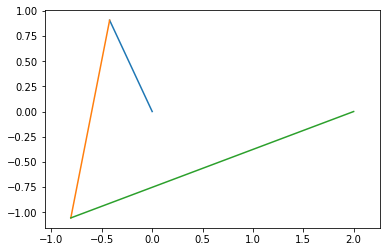

num iters:4
q
array([[-0.34203358],
       [ 0.93968773],
       [-0.82832383],
       [-1.00029211],
       [16.92967944]])


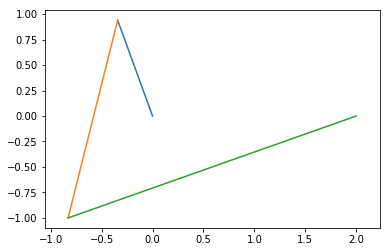

num iters:4
q
array([[-0.25883293],
       [ 0.96592211],
       [-0.84707062],
       [-0.9456156 ],
       [17.01694583]])


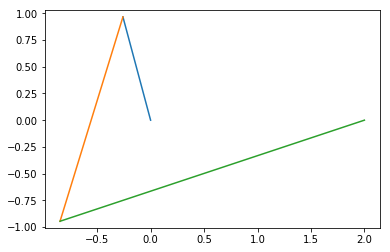

num iters:4
q
array([[-0.17366241],
       [ 0.98480524],
       [-0.86426569],
       [-0.89217827],
       [17.10421222]])


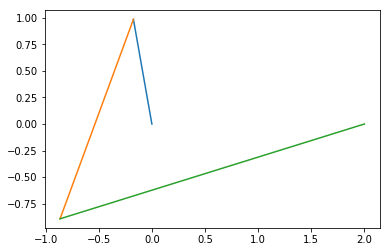

num iters:4
q
array([[-0.08717021],
       [ 0.99619343],
       [-0.88001685],
       [-0.83994224],
       [17.19147861]])


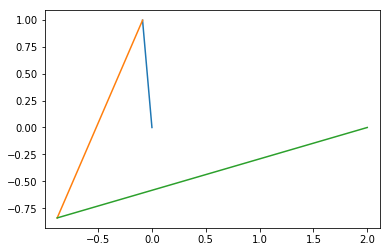

num iters:4
q
array([[-1.45947439e-05],
       [ 1.00000000e+00],
       [-8.94424888e-01],
       [-7.88862831e-01],
       [ 1.72787450e+01]])


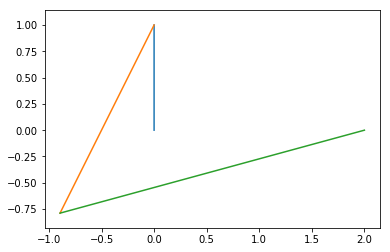

num iters:4
q
array([[ 0.08714113],
       [ 0.99619598],
       [-0.90758349],
       [-0.73888988],
       [17.36601139]])


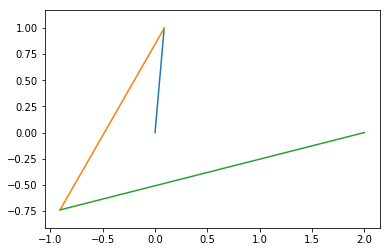

0

In [3]:
i=0
while (i<200):
      
    q[4] = i*5*3.14159/180
    q = resuelve_prob_posicion(q,meca)
    print ("q")
    pprint.pprint (q)
    dibuja_mecanismo(q,meca) 
    sleep(0.2)
    i= i+1
	
os.system('pause')